# Exercise 9
### Use scipy.fft to calculate the Discrete Fourier Transform of below function:
$$ f(x) = sin(2\pi(3/48)t)+2cos(2\pi(5/48)t)+3sin(2\pi(7/48)t)+cos(2\pi(7/48)t)+N(0,\sigma^2) $$


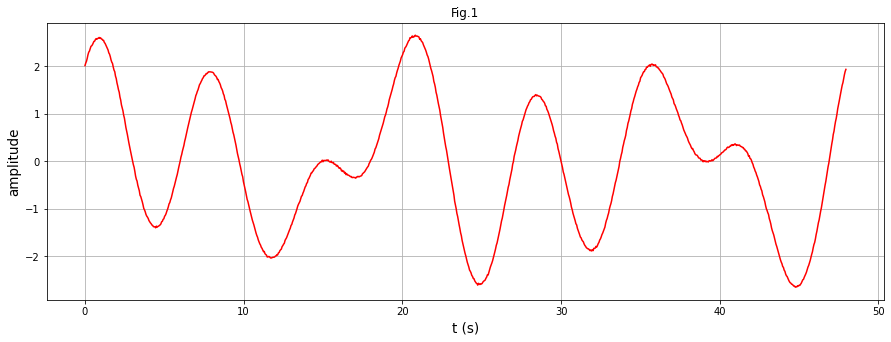

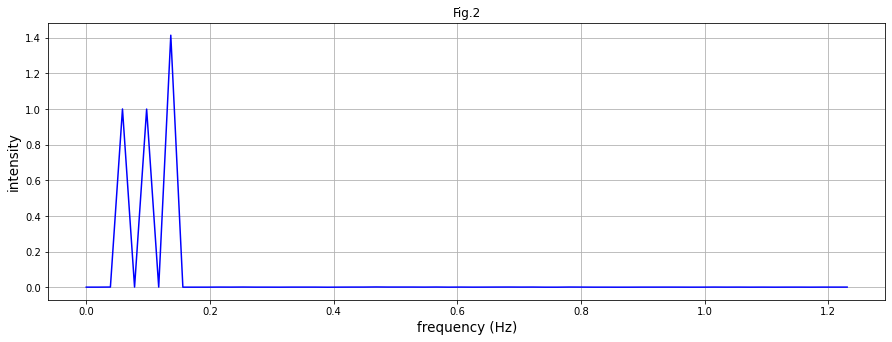

In [4]:
from scipy.fft import fft, ifft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt

n=1024
noise = np.random.normal(0,0.01,n)
dt = 0.05
t = np.linspace(0, 48, n, endpoint=False)
y = np.sin(2*np.pi*(3/48)*t) + np.cos(2*np.pi*(5/48)*t) + np.sin(2*np.pi*(7/48)*t) + np.cos(2*np.pi*(7/48)*t) + noise


#original figure
plt.figure(figsize=(15,5), dpi=72)
plt.plot(t, y, linestyle='-', color='red')
plt.grid()
plt.xlabel('t (s)', fontsize=13.5)
plt.ylabel('amplitude', fontsize=13.5)
plt.title('Fig.1')
plt.show()


#figure after Fourier Transform
plt.figure(figsize=(15,5), dpi=72)
yf = fft(y)
xf = fftfreq(n, dt)
plt.plot(xf[:n//16], 2/n*np.abs(yf[:n//16]), linestyle='-', color='blue')
plt.grid()
plt.xlabel('frequency (Hz)', fontsize=13.5)
plt.ylabel('intensity', fontsize=13.5)
plt.title('Fig.2')
plt.show()


Use $ \textcolor{orange}{np.random.normal} $ to create a Gaussian noise with standard deriviation = 0.01. Figure 1 shows the original sigmal with added Gaussian noise, setting $ \Delta t $ = 0.05, $ \sigma $ = 0.01. Figure 2 

# Exercise 10


# Exercise 11
### Choose another $ \sigma $ and n and then apply FFt and inverse FFT

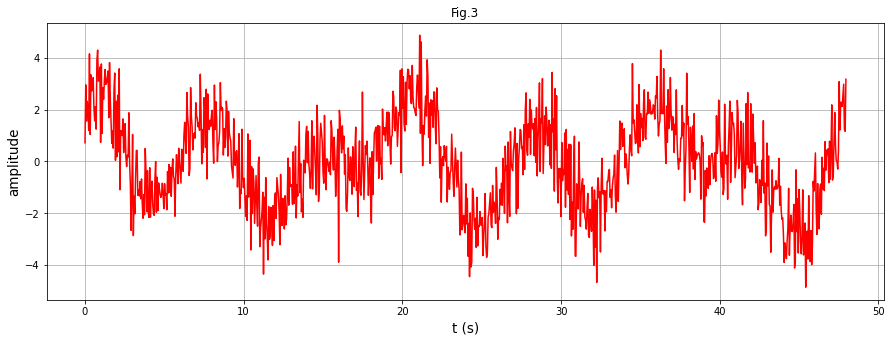

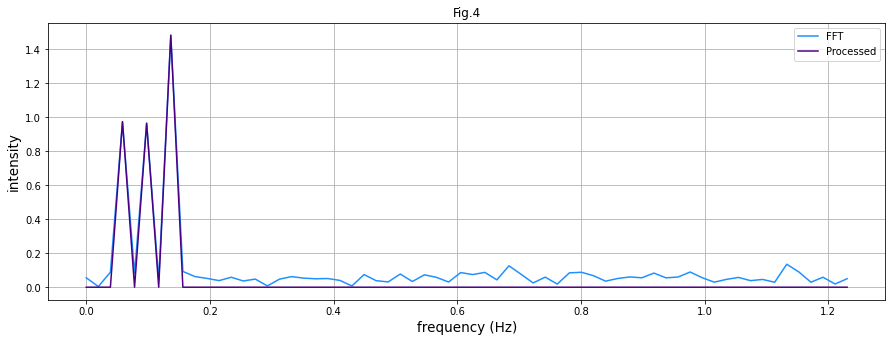

In [37]:
nnew = 1024
noisenew = np.random.normal(0,1,nnew)
tnew = np.linspace(0, 48, nnew, endpoint=False)
ynew = np.sin(2*np.pi*(3/48)*tnew) + np.cos(2*np.pi*(5/48)*tnew) + np.sin(2*np.pi*(7/48)*tnew) + np.cos(2*np.pi*(7/48)*tnew) + noisenew


#original figure
plt.figure(figsize=(15,5), dpi=72)
plt.plot(tnew, ynew, linestyle='-', color='red')
plt.grid()
plt.xlabel('t (s)', fontsize=13.5)
plt.ylabel('amplitude', fontsize=13.5)
plt.title('Fig.3')
plt.show()


#figure after Fourier Transform
plt.figure(figsize=(15,5), dpi=72)
yfnew = fft(ynew)
xfnew = fftfreq(nnew, dt)
plt.plot(xfnew[:nnew//16], 2/nnew*np.abs(yfnew[:nnew//16]), linestyle='-', color='dodgerblue')
yf_abs = np.abs(yfnew)
indices     = yf_abs>400  # filter out those value under 300
yf_clean    = indices * yfnew # noise frequency will be set to 0
plt.plot(xfnew[:nnew//16], 2/nnew*np.abs(yf_clean[:nnew//16]), linestyle='-', color='indigo')
plt.grid()
plt.xlabel('frequency (Hz)', fontsize=13.5)
plt.ylabel('intensity', fontsize=13.5)
plt.legend(['FFT','Processed'])
plt.title('Fig.4')
plt.show()

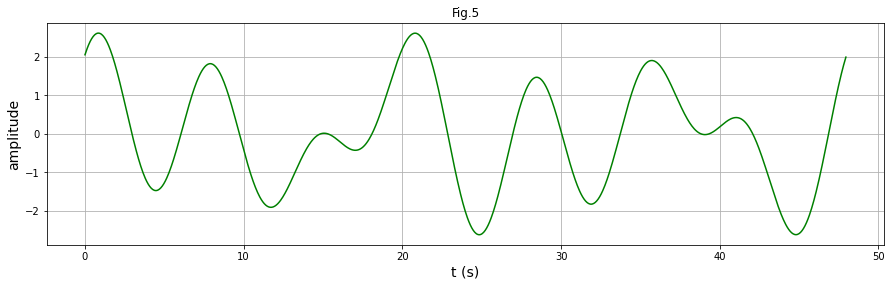

In [35]:
yif = ifft(yf_clean)
plt.figure(figsize=(15,4), dpi=72)
plt.plot(t, yif.real, linestyle='-', color='green')
plt.grid()
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.title('Fig.5')
plt.show()

In Exercise 11, we change the value of $\sigma$ from 0.01 to 1, and remain the value of n at the same time. We can see that in figure 5, the original signal is noisy, for we tuned the value of $\sigma$. Next, we apply FFT again, but this time we'll find out so much noise around the bottom of the graph. After setting a threshold to remove the noise (purple line), do the inverse FFT, whose result is presented with figure 6. As we can see noise in figure 3 is removed.